In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
from scipy.special import comb
import numpy as np
import pickle
from IPython.display import set_matplotlib_formats

plt.style.use('seaborn')
plt.style.use('seaborn-paper')
plt.style.use('tableau-colorblind10')
plt.rcParams.update({
    'figure.figsize': (3.5, 2.5),
    'text.usetex': True,
    'font.size': 6,
    'axes.titlesize': 8,
    'ytick.labelsize': 6,
    'xtick.labelsize': 6,
    'axes.labelsize': 6,
    'legend.fontsize': 4,
    'lines.markersize': 2,
    'lines.linewidth': 0.5,
    'errorbar.capsize': 2,
    'ytick.major.pad': 2,
    'xtick.major.pad': 2,
    'axes.labelpad': 2
})

In [20]:
k = 2
gamma = 0.7413793103448276
N = 29
D = N - 1
E = int(comb(N, k))
Ef = E * gamma
E

missing = int(E-Ef)
h = hypergeom(E, E-missing, D)
h.ppf(0.1), h.ppf(0.1) / D

(18.0, 0.6428571428571429)

In [21]:
lambd = 0.02

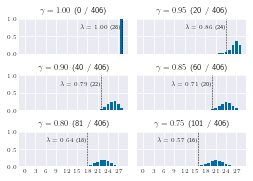

In [22]:
ndegree = np.arange(0, D+1)

fig, axes = plt.subplots(ncols=2, nrows=3, sharex=True, sharey=True)
for i, ax in enumerate(axes.ravel()):
    gamma = 1. - i*0.05
    missing = int(E-E*gamma)
    h = hypergeom(E, E-missing, D)
    ax.bar(ndegree, h.pmf(ndegree))#, color='gray')
    ax.set_ylim(0., 1.)
    ax.set_title(f'$\\gamma = {gamma:.2f}$ ({missing} / {E})')
    x = h.ppf(lambd)
    ax.axvline(x, linestyle='--', color='black')
    ax.text(x-12, 0.7, f'$\\lambda={x/D:.2f}$ ({x:.0f})')
    ax.set_xticks(np.arange(0, D+1, step=3))
plt.tight_layout()
plt.savefig('/home/aalvarez/Downloads/hypergeom.eps', bbox_inches='tight', pad_inches=0.05)
plt.show()